In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style("darkgrid")

In [42]:
data = pd.read_csv("dataset.csv", index_col=0)
data["Experiment"] = data["Experiment"] + 1
data["Generation"] = data["Generation"] + 1
data.head()

,Experiment,Generation,Mean_fit,Max_fit,Worst_fit,Var
0,1,1,86.3,327,-18,13517.81
1,1,2,256.0,372,54,10465.40
2,1,3,291.1,372,87,6244.29
3,1,4,311.9,373,87,6685.09
4,1,5,332.3,373,268,1321.61


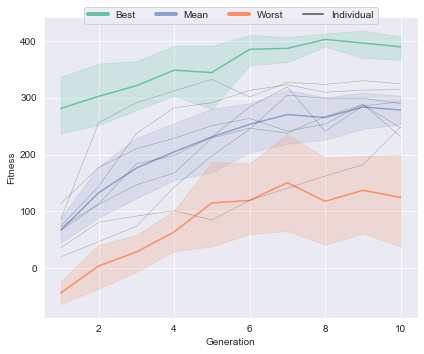

In [74]:
fig, ax = plt.subplots(figsize=(6, 5))
cmap = sns.color_palette("Set2")

# this is for the legend
custom_lines = [Line2D([0], [0], color=cmap[0], lw=4),
                Line2D([0], [0], color=cmap[2], lw=4),
                Line2D([0], [0], color=cmap[1], lw=4),
                Line2D([0], [0], color='black', lw=2, alpha=0.5)]
ax.legend(custom_lines, ['Best', 'Mean', 'Worst', 'Individual'], loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True)

# here comes the data
sns.lineplot(x="Generation", y="Max_fit", data=data, ax=ax, color=cmap[0])
sns.lineplot(x="Generation", y="Mean_fit", data=data, ax=ax, color=cmap[2])
sns.lineplot(x="Generation", y="Worst_fit", data=data, ax=ax, color=cmap[1])
for e in data["Experiment"].unique():
    x = data["Generation"].unique()
    y = data.loc[data["Experiment"]==e]["Mean_fit"]
    ax.plot(x, y, c='black', alpha=0.3, lw=0.5)

plt.ylabel("Fitness")
plt.tight_layout()
plt.savefig("evolution_2.png")